In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read initial data and analyse the text file
Let's load our dataset, examine rudimentary attributes, and fix any issues.

In [2]:
data = pd.read_csv('./WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header = None,sep=",")
data.columns = ['id', 'class', 'timestamp', 'x', 'y', 'z']

In [3]:
data = data.sort_values(['id', 'timestamp'])
data.head()

,id,class,timestamp,x,y,z
941965,1,Walking,4991922345000,0.69,10.80,-2.03
941966,1,Walking,4991972333000,6.85,7.44,-0.50
941967,1,Walking,4992022351000,0.93,5.63,-0.50
941968,1,Walking,4992072339000,-2.11,5.01,-0.69
941969,1,Walking,4992122358000,-4.59,4.29,-1.95


In [4]:
data.columns

Index(['id', 'class', 'timestamp', 'x', 'y', 'z'], dtype='object')

In [5]:
data.head()

,id,class,timestamp,x,y,z
941965,1,Walking,4991922345000,0.69,10.80,-2.03
941966,1,Walking,4991972333000,6.85,7.44,-0.50
941967,1,Walking,4992022351000,0.93,5.63,-0.50
941968,1,Walking,4992072339000,-2.11,5.01,-0.69
941969,1,Walking,4992122358000,-4.59,4.29,-1.95


In [6]:
for i in data.columns:
    print(i,data[i][pd.to_numeric(data[i],errors='coerce').isnull()].nunique())

id 0
class 6
timestamp 0
x 0
y 0
z 0


## Correct errors in data
There seems to be a missing number. Let's just drop that row.

In [7]:
data[pd.to_numeric(data['z'],errors='coerce').isnull()]

,id,class,timestamp,x,y,z
343419,11,Walking,1867172313000,4.4,4.4,NaN


In [8]:
idx = data[pd.to_numeric(data['z'],errors='coerce').isnull()].index
idx

Int64Index([343419], dtype='int64')

In [9]:
for x in idx:
    print(x)
    data.drop(x,axis=0,inplace=True)

343419


## Canonicalize data format
Ensure that the parsed data is consistent.

In [10]:
data[['timestamp','id']]=data[['timestamp','id']].astype(int)
data[[ 'x', 'y', 'z']]=data[[ 'x', 'y', 'z']].astype(float)
data[['class']]=data[['class']].astype(str)

In [11]:
data.dtypes

id             int64
class         object
timestamp      int64
x            float64
y            float64
z            float64
dtype: object

In [12]:
data.sort_values(['id','timestamp'],inplace=True)

In [13]:
data.reset_index(drop=True,inplace=True)

Pull out class domain for later use.

In [14]:
# classes = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
classes = list(data['class'].unique())

## Explore basic statistics on data

In [15]:
data.groupby('class').size()/data.shape[0]*100

class
Downstairs     9.144625
Jogging       31.157941
Sitting        5.457891
Standing       4.406724
Upstairs      11.188136
Walking       38.644683
dtype: float64

In [16]:
data[(data['id']==2)&(data['class']=='Walking')]['timestamp'].max()

10012532331000

In [17]:
data[(data['id']==2)&(data['timestamp']>=10012532331000)]

,id,class,timestamp,x,y,z
47245,2,Walking,10012532331000,-2.96,7.31,-4.40
47246,2,Jogging,10065442335000,-4.71,2.18,3.68
47247,2,Jogging,10065492322000,-9.89,6.89,2.68
47248,2,Jogging,10065542341000,-9.66,11.54,2.11
47249,2,Jogging,10065592328000,-8.08,9.28,4.52
...,...,...,...,...,...,...
53498,2,Jogging,10378042341000,-12.18,3.30,0.34
53499,2,Jogging,10378092298000,-11.03,3.26,-5.86
53500,2,Jogging,10378142347000,-10.34,7.50,-6.09
53501,2,Jogging,10378192335000,-8.35,5.48,-2.41


In [18]:
data.iloc[17855:17865]

,id,class,timestamp,x,y,z
17855,1,Walking,5974702314000,-2.87,6.55,-0.04
17856,1,Walking,5974702314000,-2.87,6.55,-0.04
17857,1,Walking,5974772290000,0.61,19.46,12.22
17858,1,Walking,5974822278000,-1.31,12.07,-0.46
17859,1,Walking,5974872327000,-1.18,12.95,1.18
17860,1,Jogging,5995682355000,10.04,5.67,1.76
17861,1,Jogging,5995732343000,5.28,8.35,1.31
17862,1,Jogging,5995782331000,6.59,9.28,5.52
17863,1,Jogging,5995832349000,3.72,7.35,5.28
17864,1,Jogging,5995882337000,10.53,10.99,3.30


*Sampling rate*

20Hz (1 sample every 50ms)

* 10 sec - 200 records
* 12 sec - 240 records 
* 20 sec - 400 records

In [19]:
data.describe()

,id,timestamp,x,y,z
count,1.098208e+06,1.098208e+06,1.098208e+06,1.098208e+06,1.098208e+06
mean,1.886067e+01,3.340895e+13,6.628660e-01,7.255626e+00,4.110784e-01
std,1.021423e+01,4.944962e+13,6.849046e+00,6.746216e+00,4.754120e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.019110e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,9.722677e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,4.996560e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [20]:
data.groupby('id')['timestamp'].shift(periods=1).diff()

0                 NaN
1                 NaN
2          49988000.0
3          50018000.0
4          49988000.0
              ...    
1098203    49987000.0
1098204    49988000.0
1098205    50018000.0
1098206    50019000.0
1098207    49988000.0
Name: timestamp, Length: 1098208, dtype: float64

In [21]:
from datetime import datetime

timestamp = 4991922345
datetime.fromtimestamp(timestamp)

datetime.datetime(2128, 3, 9, 16, 5, 45)

In [22]:
datetime.timestamp(datetime.now())

1638755838.982292

In [23]:
data.timestamp[0]

4991922345000

In [24]:
(data[:200].timestamp.max()-data[:200].timestamp.min())

9950013000

In [25]:
data

,id,class,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1098203,36,Standing,15049012250000,-0.91,9.43,2.533385
1098204,36,Standing,15049062268000,-1.18,9.51,2.492524
1098205,36,Standing,15049112287000,-1.50,9.53,2.533385
1098206,36,Standing,15049162275000,-2.07,8.77,2.179256


## Visualize raw data

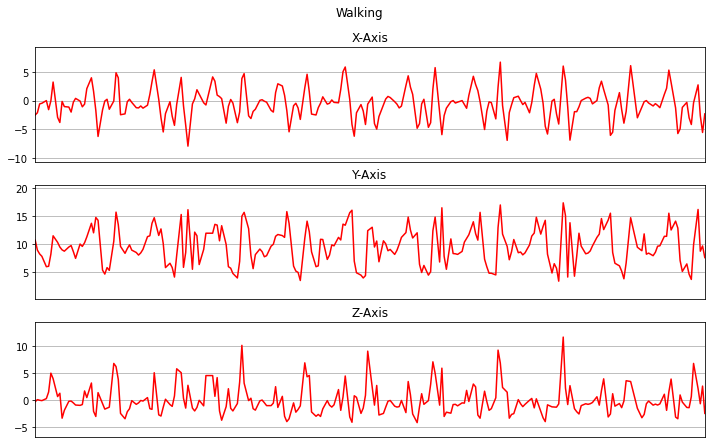

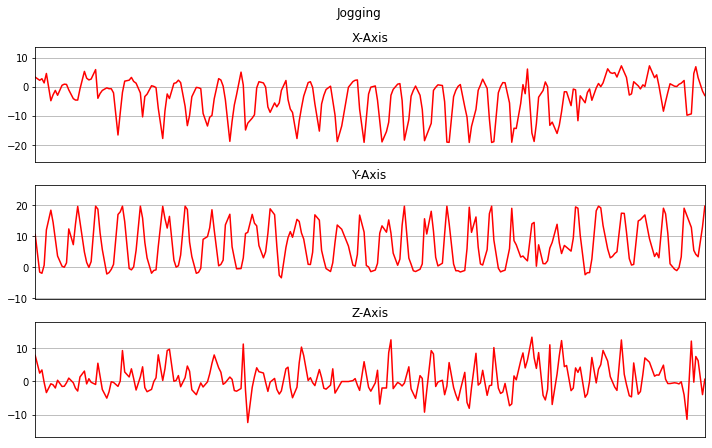

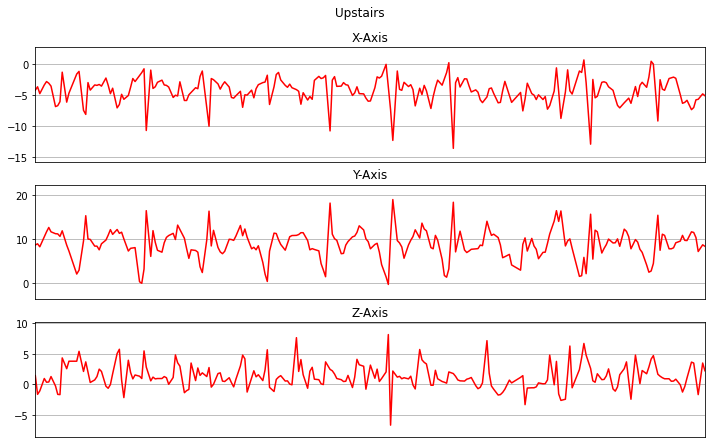

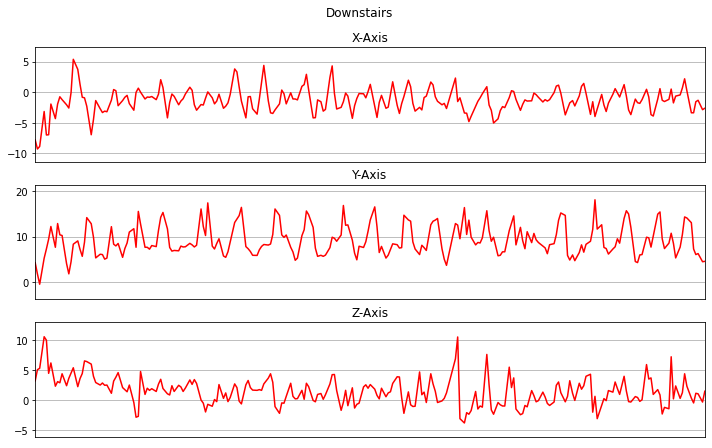

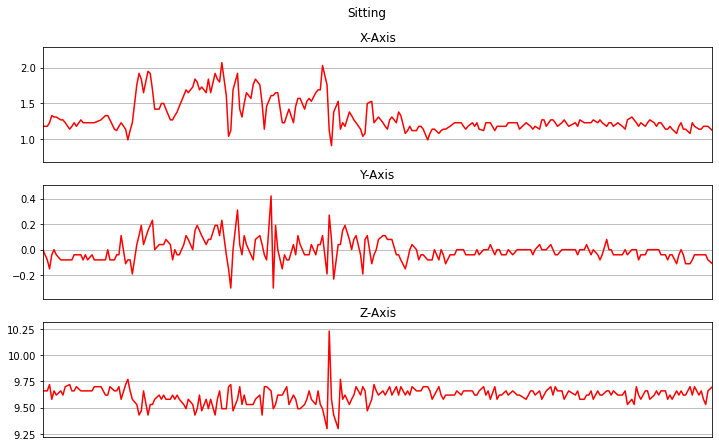

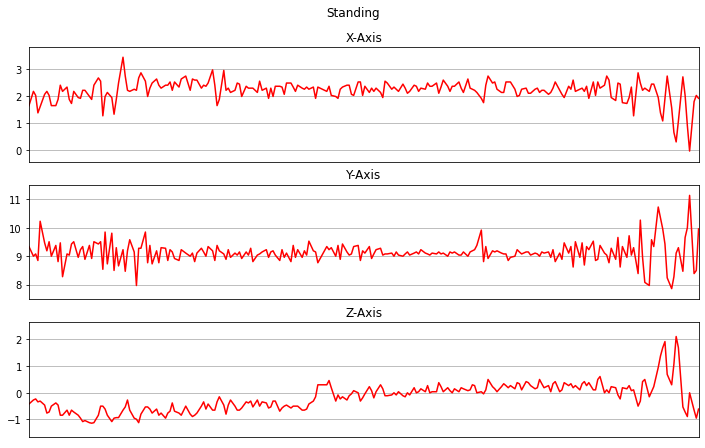

In [26]:
seconds = 20
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 7))
    plot_axis(ax0, data['timestamp'], data['x'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
for c in classes:
    plot_activity(c, data[(data['id']==31)&(data['class'] == c)][:seconds*12])

In [27]:
data.groupby('class')['x'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Downstairs,100427.0,0.471718,4.955948,-19.61,-2.18,0.08,2.83,19.95
Jogging,342179.0,-0.201963,9.109470,-19.61,-5.43,0.00,5.18,19.95
Sitting,59939.0,1.856270,4.759028,-10.31,-1.61,1.53,5.75,12.45
Standing,48395.0,-1.178258,3.235125,-10.99,-2.03,-1.12,0.61,13.10
Upstairs,122869.0,0.381334,5.495272,-19.61,-2.26,0.15,3.06,19.95
Walking,424399.0,1.528288,5.793331,-19.61,-2.15,0.95,4.82,19.91


In [28]:
data.groupby('class')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Downstairs,100427.0,8.600230,4.904716,-19.61,5.94,8.58,11.45,20.04
Jogging,342179.0,5.461080,9.224947,-19.61,-0.72,4.56,13.38,20.04
Sitting,59939.0,1.853374,3.257750,-9.30,-0.95,2.49,3.72,18.47
Standing,48395.0,8.987236,1.264772,-0.65,8.50,9.43,9.81,19.46
Upstairs,122869.0,8.111545,4.890709,-19.61,5.43,8.54,11.03,20.04
Walking,424399.0,8.702048,5.006519,-18.85,5.28,8.77,12.15,20.04


In [29]:
data.groupby('class')['z'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Downstairs,100427.0,0.684080,3.706798,-19.61,-1.438689,0.503953,2.750000,19.34
Jogging,342179.0,-0.124295,5.833195,-19.80,-3.490000,-0.299648,3.296124,19.61
Sitting,59939.0,6.559716,3.735591,-10.80,5.710000,8.117727,8.920000,13.99
Standing,48395.0,0.580193,1.376870,-4.14,-0.500000,0.650000,1.420000,7.25
Upstairs,122869.0,0.323542,3.567884,-19.61,-1.688923,0.081722,2.070293,19.19
Walking,424399.0,-0.084199,4.011106,-19.38,-2.370000,-0.503953,1.690000,19.23


In [30]:
data

,id,class,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1098203,36,Standing,15049012250000,-0.91,9.43,2.533385
1098204,36,Standing,15049062268000,-1.18,9.51,2.492524
1098205,36,Standing,15049112287000,-1.50,9.53,2.533385
1098206,36,Standing,15049162275000,-2.07,8.77,2.179256


In [31]:
data.groupby('id')['class'].max()

id
1     Walking
2     Walking
3     Walking
4     Walking
5     Walking
6     Walking
7     Walking
8     Walking
9     Walking
10    Walking
11    Walking
12    Walking
13    Walking
14    Walking
15    Walking
16    Walking
17    Walking
18    Walking
19    Walking
20    Walking
21    Walking
22    Walking
23    Walking
24    Walking
25    Walking
26    Walking
27    Walking
28    Walking
29    Walking
30    Walking
31    Walking
32    Walking
33    Walking
34    Walking
35    Walking
36    Walking
Name: class, dtype: object

In [32]:
data.head()

,id,class,timestamp,x,y,z
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


# Base Learning Models
Here we define our two base methods for classification: A vanilla decision tree
as well as a simple logistic regression classifier. Later on, we will cover
more advanced models, but these two will suffice for setting a baseline
expectation and for exploring feature generation.

In [38]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def generate_all_stats(model, train, y_train, test, y_test):
    frame = pd.DataFrame({
        'train': [accuracy_score(model.predict(train), y_train), f1_score(model.predict(train), y_train, average="macro")],
        'test': [accuracy_score(model.predict(test), y_test), f1_score(model.predict(test), y_test, average='macro')]
    })

    frame.index = ['Accuracy', 'F1']
    return frame

def recall_s2(pred_y, y, c):
    tp = y[(y == c) & (pred_y == c)].size
    fn = y[(y == c) & (pred_y != c)].size
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

def precision_s2(pred_y, y, c):
    tp = y[(y == c) & (pred_y == c)].size
    fp = y[(y != c) & (pred_y == c)].size
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def f1_s2(pred_y, y, c):
    precision = precision_s2(pred_y, y, c)
    recall = recall_s2(pred_y, y, c)
    if (precision + recall) == 0:
        print(f'prec: {precision}, rec: {recall}')
        return 0
    return 2 * precision * recall / (precision + recall)

def generate_per_class_stats(model, x, y, x_test, y_test):
    classMap = {}
    for c in classes:
        x_f, y_f = x, y
        x_f_test, y_f_test = x_test, y_test
        train_pred = model.predict(x_f)
        test_pred = model.predict(x_f_test)

        classMap[c] = [
            accuracy_score(train_pred[y_f == c], y_f[y_f == c]),
            recall_s2(train_pred, y_f.to_numpy(), c),
            precision_s2(train_pred, y_f.to_numpy(), c),
            f1_s2(train_pred, y_f.to_numpy(), c),
            accuracy_score(test_pred[y_f_test == c], y_f_test[y_f_test == c]),
            recall_s2(test_pred, y_f_test.to_numpy(), c),
            precision_s2(test_pred, y_f_test.to_numpy(), c),
            f1_s2(test_pred, y_f_test.to_numpy(), c)
            ]
    frame = pd.DataFrame(classMap)
    frame.index = ['Acc (train)', 'Recall (train)', 'Prec (train)', 'F1 (train)', 'Acc (test)', 'Recall (test)', 'Prec (test)', 'F1 (test)']
    return frame

def evaluate_with_features(f_data, features, class_label='class', skip_log=False):
    train, test, y_train, y_test = train_test_split(f_data[features], f_data[class_label], stratify=f_data[class_label])
    dt = tree.DecisionTreeClassifier()
    dt.fit(train, y_train)

    frame1 = generate_all_stats(dt, train, y_train, test, y_test)
    frame2 = generate_per_class_stats(dt, train, y_train, test, y_test)

    if skip_log:
        return frame1, frame2

    clf = LogisticRegression(solver='saga')
    clf.fit(train, y_train)

    frame3 = generate_all_stats(clf, train, y_train, test, y_test)
    frame4 = generate_per_class_stats(clf, train, y_train, test, y_test)

    return frame1, frame2, frame3, frame4

In [34]:
# Uncomment to export data.
# data[['id', 'class', 'timestamp', 'x', 'y', 'z']].to_csv('./preProcessed_data.csv',index=False)

## Examine base model performance on raw data
Now that we have our models, lets examine they work on the unprocessed x,y,z
accelerometer values!

In [39]:
dt_all, dt_class, log_all, log_class = evaluate_with_features(data, ['x', 'y', 'z'], class_label='class')

prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


In [40]:
# Decision tree stats
dt_all

,train,test
Accuracy,0.997679,0.546152
F1,0.997360,0.565009


In [41]:
# Decision tree stats by class
dt_class

,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.996374,0.999762,0.995117,0.997610,0.999844,0.998347
Recall (train),0.996374,0.999762,0.995117,0.997610,0.999844,0.998347
Prec (train),0.999937,0.996218,0.996978,0.994784,0.999489,0.993884
F1 (train),0.998153,0.997987,0.996046,0.996195,0.999666,0.996110
Acc (test),0.563308,0.632474,0.220497,0.197236,0.971636,0.809240
Recall (test),0.563308,0.632474,0.220497,0.197236,0.971636,0.809240
Prec (test),0.577939,0.629406,0.214078,0.187583,0.968341,0.808906
F1 (test),0.570530,0.630936,0.217240,0.192288,0.969986,0.809073


Hmm, tthe high training but low test accuracy suggests overfitting. Let's try
some regularization?

depth: 8
prec: 0.0, rec: 0.0
depth: 10
depth: 12
depth: 14
depth: 16
depth: 18
depth: 20
depth: 22
depth: 24
depth: 26
depth: 28


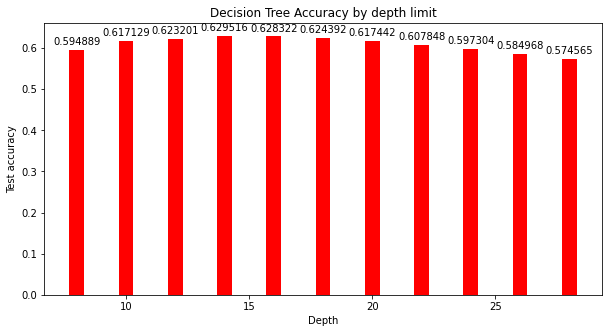

In [42]:
train, test, y_train, y_test = train_test_split(data[['x','y','z']], data['class'], stratify=data['class'])

frames = []
depths = []

for depth in range(4, 15):
    print(f'depth: {depth*2}')
    dt = tree.DecisionTreeClassifier(max_depth=depth*2)
    dt.fit(train, y_train)

    frame1 = generate_all_stats(dt, train, y_train, test, y_test)
    frame2 = generate_per_class_stats(dt, train, y_train, test, y_test)
    frames.append((frame1, frame2))
    depths.append(depth*2)


fig = plt.figure(figsize = (10, 5))
 
bar = plt.bar(depths, list(map(lambda v: v[0]['test'][0], frames)), color ='red', width = 0.6)
plt.bar_label(bar, padding=3)
 
plt.xlabel("Depth")
plt.ylabel("Test accuracy")
plt.title("Decision Tree Accuracy by depth limit")
plt.show()


So it seems to peak at about 0.63 accuracy. Not terrible for a naive baseline.

Now what about logistic regression?

In [43]:
log_all

,train,test
Accuracy,0.475638,0.476409
F1,0.249560,0.249987


In [44]:
log_class

,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.807904,0.454441,0.0,0.0,0.400000,0.0
Recall (train),0.807904,0.454441,0.0,0.0,0.400000,0.0
Prec (train),0.464019,0.505691,0.0,0.0,0.462976,0.0
F1 (train),0.589474,0.478698,0.0,0.0,0.429190,0.0
Acc (test),0.807267,0.457841,0.0,0.0,0.399226,0.0
Recall (test),0.807267,0.457841,0.0,0.0,0.399226,0.0
Prec (test),0.464689,0.506413,0.0,0.0,0.463973,0.0
F1 (test),0.589844,0.480904,0.0,0.0,0.429171,0.0


## Examine Axis Normalization via PCA
Phones aren't strictly guaranteed to have the same real-world orientation, so
let's examine projecting x,y,z onto the high-variance vector components.

In [45]:
from sklearn.decomposition import PCA

# Should be 3D...
def generatePCA2D(X,person='all'):
    pca = PCA(n_components=3)
    pca.fit(X)

    m = X.mean()
    t_mean = [m['x'], m['y']]
    components = pca.components_
    print(components)
    values = pca.singular_values_ / 10
    plt.title('Person ID: ' + person)
    plt.axis('equal')
    plt.arrow(t_mean[0], t_mean[1], components[0, 0]*values[0], components[1, 0]*values[0], ec='red', head_width=0.1)
    plt.arrow(t_mean[0], t_mean[1], components[0, 1]*values[1], components[1, 1]*values[1], ec='green', head_width=0.1)
    #plt.scatter(X['x'], X['y'], s=10)
    plt.show()


[[-0.86712998 -0.49030744 -0.08765961]
 [ 0.4898669  -0.8713489   0.02795562]
 [ 0.09008895  0.01870039 -0.99575814]]


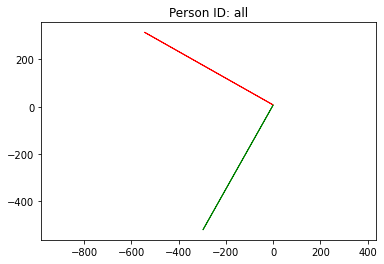

In [46]:
generatePCA2D(train)

[[-0.87385356 -0.48529606  0.0294565 ]
 [ 0.48557526 -0.86810297  0.10302378]
 [-0.02442576  0.10433105  0.99424263]]


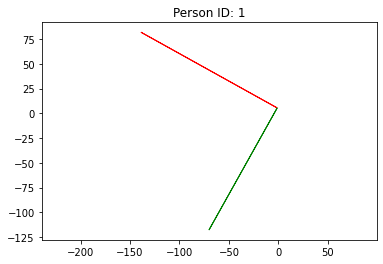

[[ 0.89118323 -0.32302165  0.31851132]
 [-0.20529491 -0.91328275 -0.35180766]
 [-0.40453238 -0.24813633  0.88021697]]


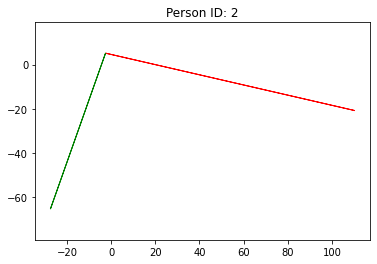

[[ 0.86269179  0.47083738  0.18459423]
 [-0.50425433  0.82869071  0.24289766]
 [ 0.03860622  0.30262826 -0.95232646]]


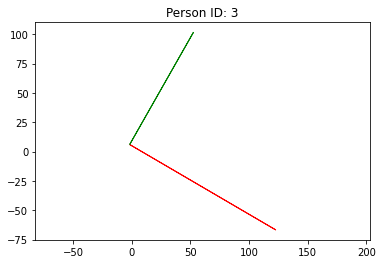

[[-0.69796483 -0.65086313 -0.29870101]
 [ 0.51363532 -0.74562997  0.42451703]
 [ 0.49902291 -0.14287457 -0.85472978]]


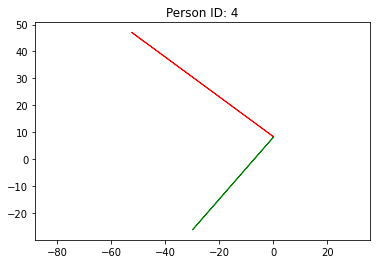

[[-0.26914381 -0.90989394 -0.31568121]
 [-0.70957201  0.40896714 -0.5738061 ]
 [ 0.65120593  0.06956219 -0.75570625]]


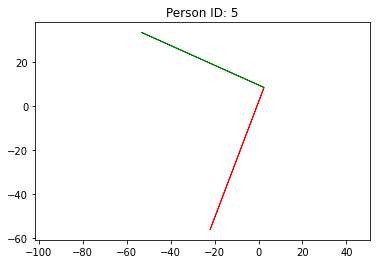

[[-0.72642321  0.62360641 -0.28883275]
 [-0.66070141 -0.74937309  0.04374497]
 [-0.18916385  0.22260957  0.95637964]]


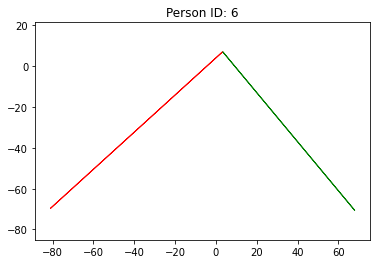

[[-0.99962158  0.02693648  0.00557877]
 [-0.02493808 -0.97299055  0.22949396]
 [-0.01160985 -0.22926799 -0.9732941 ]]


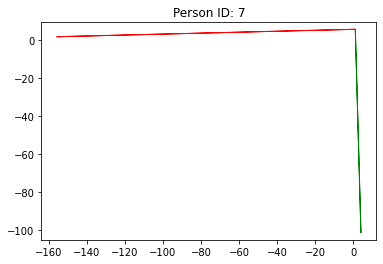

In [47]:
for p in range(1, 8):
    data2 = data[data['id'] == p][['x', 'y', 'z']]
    generatePCA2D(data2, str(p))

In [48]:
projData = pd.read_csv('./preProcessed_data.csv')
unflat = []
unflat_y = []
for p in projData.groupby('id'):
    id = p[0]
    pData = p[1][['x', 'y', 'z']]
    ys = list(p[1]['class'])
    pca = PCA(n_components=3)
    pca.fit(pData)
    new = pca.transform(pData)
    projData.loc[projData['id'] == id,['x', 'y', 'z']] = new
    unflat.append(new)
    unflat_y.append(ys)
print(projData)
print(unflat[0])

         id     class       timestamp         x         y         z
0         1   Walking   4991922345000 -4.343887 -3.881268 -1.917725
1         1   Walking   4991972333000 -8.051162  2.184328 -0.897549
2         1   Walking   4992022351000 -1.999563  0.880989 -0.941788
3         1   Walking   4992072339000  0.952238 -0.076510 -1.121125
4         1   Walking   4992122358000  3.431693 -0.785513 -2.388413
...      ..       ...             ...       ...       ...       ...
1098203  36  Standing  15049012250000 -1.237539 -0.125010  1.254719
1098204  36  Standing  15049062268000 -1.328165 -0.021741  1.005537
1098205  36  Standing  15049112287000 -1.363376  0.180052  0.755518
1098206  36  Standing  15049162275000 -0.619533  0.214199  0.067448
1098207  36  Standing  15049212262000 -1.771388  1.112551  0.599694

[1098208 rows x 6 columns]
[[-4.34388748 -3.88126753 -1.91772541]
 [-8.05116221  2.18432844 -0.89754918]
 [-1.99956325  0.88098927 -0.94178789]
 ...
 [-8.63276244  4.73598951 -1.82865

In [49]:
rows = []
y_vals = []
for mat, ys in zip(unflat, unflat_y):
    for row, y in zip(mat, ys):
        rows.append(row)
        y_vals.append(y)


projected_X = np.array(rows)
projected_Y = np.array(y_vals)

In [50]:
# proj_train, proj_test, proj_y_train, proj_y_test = train_test_split(projected_X, projected_Y,)
# clf = LogisticRegression(solver='liblinear')
# clf.fit(proj_train, proj_y_train)
# print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(proj_train), proj_y_train)}.')
# print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(proj_test), proj_y_test)}.')

In [51]:
# dt = tree.DecisionTreeClassifier()
# dt.fit(proj_train, proj_y_train)
# accuracy_score(dt.predict(proj_test),proj_y_test)

In [52]:
# projDataTotal = pd.read_csv('./preProcessed_data.csv')
# x_num, y_num = projDataTotal[['x', 'y', 'z']], projDataTotal['class']
# pca = PCA(n_components=3)
# pca.fit(x_num)
# x_num_proj = pca.transform(x_num)

# projDataTotal.loc[:, ['x', 'y,', 'z']] = x_num_proj

# proj_train, proj_test, proj_y_train, proj_y_test = train_test_split(x_num_proj, y_num,)
# clf = LogisticRegression(solver='liblinear')
# clf.fit(proj_train, proj_y_train)
# print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(proj_train), proj_y_train)}.')
# print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(proj_test), proj_y_test)}.')

# dt = tree.DecisionTreeClassifier()
# dt.fit(proj_train, proj_y_train)
# accuracy_score(dt.predict(proj_test),proj_y_test)

In [53]:
# x_num_proj = np.random.rand(y_num.shape[0], 3)
# proj_train, proj_test, proj_y_train, proj_y_test = train_test_split(x_num_proj, y_num,)
# clf = LogisticRegression(solver='liblinear')
# clf.fit(proj_train, proj_y_train)
# print(f'Logistic regression training accuracy: {accuracy_score(clf.predict(proj_train), proj_y_train)}.')
# print(f'Logistic regression test accuracy: {accuracy_score(clf.predict(proj_test), proj_y_test)}.')

# Features
Since performance using raw x,y,z acceleration data is not very informative,
here we generate aggregate features over rolling/sliding windows.

In [54]:
# Our base data under consideration.
data = pd.read_csv('./preProcessed_data.csv')

# Can override to some other data, like the PCA-projected above.
# Consider ProjData?
# data = projData

In [55]:
data.columns

Index(['id', 'class', 'timestamp', 'x', 'y', 'z'], dtype='object')

## Calculate rolling window features

In [56]:
# Window width
w = 200

# Sliding window 'stride'
stride = 4 * 20

# Minimum observations needed in a window for the data point to count.
min_periods = 5

# If true, the window is centered around the given point. If false, the right
# edge of the window is used.
center = True

In [57]:
def add_rolling_metrics(data, w, min_periods, center):
    rolling_data_x = data.groupby('id')['x'].rolling(window=w, min_periods=min_periods, center=center)
    rolling_data_y = data.groupby('id')['y'].rolling(window=w, min_periods=min_periods, center=center)
    rolling_data_z = data.groupby('id')['z'].rolling(window=w, min_periods=min_periods, center=center)

    data['rolling_x_mean'] = list(rolling_data_x.mean().fillna(0))
    data['rolling_y_mean'] = list(rolling_data_y.mean().fillna(0))
    data['rolling_z_mean'] = list(rolling_data_z.mean().fillna(0))

    data['rolling_x_std'] = list(rolling_data_x.std().fillna(0))
    data['rolling_y_std'] = list(rolling_data_y.std().fillna(0))
    data['rolling_z_std'] = list(rolling_data_z.std().fillna(0))

    data['rolling_x_min'] = list(rolling_data_x.min().fillna(0))
    data['rolling_y_min'] = list(rolling_data_y.min().fillna(0))
    data['rolling_z_min'] = list(rolling_data_z.min().fillna(0))

    data['rolling_x_max'] = list(rolling_data_x.max().fillna(0))
    data['rolling_y_max'] = list(rolling_data_y.max().fillna(0))
    data['rolling_z_max'] = list(rolling_data_z.max().fillna(0))

    data['rolling_x_iqr'] = np.array(rolling_data_x.quantile(0.75).fillna(0))-np.array(rolling_data_x.quantile(0.25).fillna(0))
    data['rolling_y_iqr'] = np.array(rolling_data_y.quantile(0.75).fillna(0))-np.array(rolling_data_y.quantile(0.25).fillna(0))
    data['rolling_z_iqr'] = np.array(rolling_data_z.quantile(0.75).fillna(0))-np.array(rolling_data_z.quantile(0.25).fillna(0))

    data['avg_speed'] = np.sqrt(np.square(data['x'])+np.square(data['y'])+np.square(data['z']))
    data['rolling_mean_speed'] = list(data.groupby('id')['avg_speed'].rolling(window=w,min_periods=5).mean().fillna(0))

    data['abs_x_diff'] = np.abs(data.groupby('id')['x'].diff().fillna(0))
    data['abs_y_diff'] = np.abs(data.groupby('id')['y'].diff().fillna(0))
    data['abs_z_diff'] = np.abs(data.groupby('id')['z'].diff().fillna(0))

    data['rolling_abs_x_diff'] = list(data.groupby('id')['abs_x_diff'].rolling(window=w,min_periods=5).mean().fillna(0))
    data['rolling_abs_y_diff'] = list(data.groupby('id')['abs_y_diff'].rolling(window=w,min_periods=5).mean().fillna(0))
    data['rolling_abs_z_diff'] = list(data.groupby('id')['abs_z_diff'].rolling(window=w,min_periods=5).mean().fillna(0))

In [58]:
add_rolling_metrics(data, w, min_periods, center)

### Calculate R2 coefficient per window
For each window, fit a linear regression line, and then aggregate to R2 value.
Note that the window anchor may be different than the above since Pandas made
multiple columns hard.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# What was I smoking??
def fitR2(x, y, z):
    d = np.array([x, y]).T
    reg = LinearRegression().fit(d, z)
    z_pred = reg.predict(d)
    return r2_score(z, z_pred)

def fitR21D(y):
    x = np.array(list(range(y.size))).reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    y_pred = reg.predict(x)
    return r2_score(y, y_pred)

# Load data from CSV since initial calulation took 9 minutes on my machine!
rolling_data_r2 = pd.read_csv('./window_200_r2fit.csv')
data['rolling_data_r2'] = rolling_data_r2

# Use a different rolling window method since pandas made it really hard/slow
# to do rolling window calculations over multiple columns.
# from numpy_ext import rolling_apply
# rolling_data_r2 = rolling_apply(fitR2, w, data.x.values, data.y.values, data.z.values, n_jobs=4)

data['rolling_x_r2'] = pd.read_csv('./r2x.csv')
data['rolling_y_r2'] = pd.read_csv('./r2y.csv')
data['rolling_z_r2'] = pd.read_csv('./r2z.csv')

In [60]:
# ONLY run this cell when we need to regenerate data!
# This took nearly 30 minutes on my machine so I'd avoid it unless needed.

# data['rolling_x_r2']=list(rolling_data_x.apply(fitR21D, raw=True).fillna(0))
# data['rolling_y_r2']=list(rolling_data_y.apply(fitR21D, raw=True).fillna(0))
# data['rolling_z_r2']=list(rolling_data_z.apply(fitR21D, raw=True).fillna(0))

# data['rolling_x_r2'].to_csv('./r2x.csv',index=False)
# data['rolling_y_r2'].to_csv('./r2y.csv',index=False)
# data['rolling_z_r2'].to_csv('./r2z.csv',index=False)

### Change class to modal window class
Currently, the 'class' representing each window sample is just the class taken
from the anchor of the window. Here, we generate a new feature 'class_mode'
that is equal to the most common class in that window.

In [61]:
import statistics
data['classId'] = data['class'].map(classes.index) 

class_window = data.groupby('id')['classId'].rolling(window=w, min_periods=5, center=True)
data['class_mode_id'] = list(class_window.apply(statistics.mode, raw=True).fillna(0))
data['class_mode'] = data['class_mode_id'].map(lambda x: classes[int(x)])
data.drop(columns=['classId', 'class_mode_id'], inplace=True)

### Subset Data - consider every 4th second
Apply the configured stride to our data.

In [62]:
def subsample_data(data, stride, window_width):
    for key, dat in data.groupby('id'):
        dat.reset_index(drop=True,inplace=True)

    final = pd.DataFrame()
    for key, dat in data.groupby('id'):
        dat.reset_index(drop=True, inplace=True)
        final = final.append(dat.iloc[list(range(window_width, len(dat) - window_width, stride))])
    
    return final


In [63]:
final = subsample_data(data, stride, w)

In [64]:
final['class'].value_counts()

Walking       5258
Jogging       4244
Upstairs      1510
Downstairs    1241
Sitting        740
Standing       572
Name: class, dtype: int64

### Plot Features vs Time/Index

In [65]:
features = [
    'x', 'y', 'z', 'rolling_x_mean',
    'rolling_y_mean', 'rolling_z_mean', 'rolling_x_std', 'rolling_y_std',
    'rolling_z_std', 'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
    'rolling_x_max', 'rolling_y_max', 'rolling_z_max', 'rolling_x_iqr',
    'rolling_y_iqr', 'rolling_z_iqr',  'rolling_mean_speed', 
    'rolling_abs_x_diff', 'rolling_abs_y_diff', 'rolling_abs_z_diff',
    'rolling_x_r2', 'rolling_y_r2', 'rolling_z_r2'
]

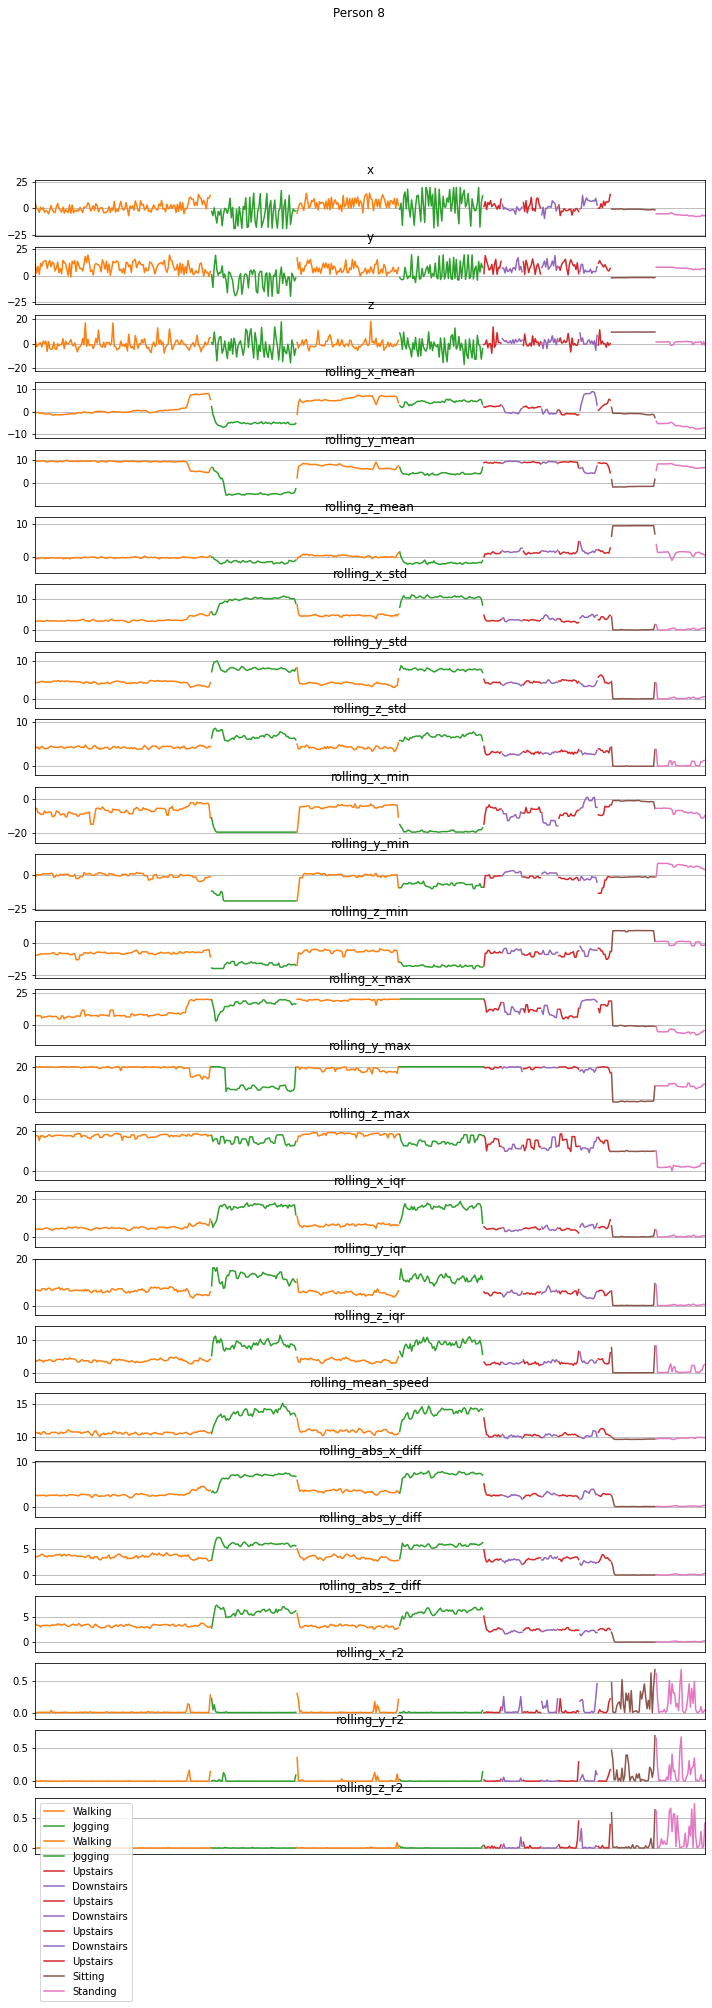

In [66]:
timeSteps = 100
def plot_activity2(activity, data):
    fig, axTup = plt.subplots(nrows=len(features), figsize=(12, 30))
    for ax, feat in zip(axTup, features):
        # Note that I'm using range() vs timestamp
        plot_axis2(ax, range(len(data)), data[feat], data['class'], feat)
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.legend()
    plt.show()

def classColor(c):
    if c == 'Walking':
        return "C1"
    elif c == 'Jogging':
        return "C2"
    elif c == 'Upstairs':
        return "C3"
    elif c == 'Downstairs':
        return "C4"
    elif c == 'Sitting':
        return "C5"
    elif c == 'Standing':
        return "C6"
    
    raise Exception('Invalid class: ' + c)

# Split x,y graph values into contiguous sublists
# based on activity.
def splitByActivity(X, Y, C):
    lastC = None
    cumXY = []
    cumClass = []
    currXY = []
    currClass = []
    for x, y, c in zip(X, Y, C):
        if lastC is not None and lastC != c:
            cumXY.append(currXY)
            currXY = []
            cumClass.append(currClass)
            currClass = []
        currXY.append([x, y])
        currClass.append(c)
        lastC = c
    if len(currXY) > 0:
        cumXY.append(currXY)
        cumClass.append(currClass)
    return cumXY, cumClass
        

def plot_axis2(ax, x, y, c, title):
    gxy, gc = splitByActivity(x, y, c)
    for xy, cc in zip(gxy, gc):
        ax.plot(list(map(lambda v: v[0], xy)), list(map(lambda v: v[1], xy)), classColor(cc[0]), label=cc[0])
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

person = 8
plot_activity2('Person ' + str(person), final[(final['id'] == person)])

# Train Using Different Features

In [67]:
raw_features = [
    'x', 'y', 'z'
]

f1, f2, f3, f4 = evaluate_with_features(final, raw_features)
f2

prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.999239,1.000000,0.999117,0.996778,1.000000,1.000000
Recall (train),0.999239,1.000000,0.999117,0.996778,1.000000,1.000000
Prec (train),1.000000,0.997806,1.000000,1.000000,1.000000,1.000000
F1 (train),0.999619,0.998902,0.999558,0.998386,1.000000,1.000000
Acc (test),0.541445,0.591894,0.158730,0.145161,0.929730,0.769231
Recall (test),0.541445,0.591894,0.158730,0.145161,0.929730,0.769231
Prec (test),0.546851,0.593012,0.160000,0.143312,0.934783,0.696203
F1 (test),0.544135,0.592453,0.159363,0.144231,0.932249,0.730897


In [68]:
base_features = [
    'x', 'y', 'z', 
    'rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean'
]

f1, f2, f3, f4 = evaluate_with_features(final, base_features)
f2

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.999746,1.000000,0.998233,0.998926,1.000000,1.000000
Recall (train),0.999746,1.000000,0.998233,0.998926,1.000000,1.000000
Prec (train),1.000000,0.998745,1.000000,1.000000,1.000000,1.000000
F1 (train),0.999873,0.999372,0.999116,0.999463,1.000000,1.000000
Acc (test),0.829658,0.824694,0.500000,0.500000,0.956757,0.755245
Recall (test),0.829658,0.824694,0.500000,0.500000,0.956757,0.755245
Prec (test),0.834098,0.849515,0.477273,0.476923,0.977901,0.710526
F1 (test),0.831872,0.836920,0.488372,0.488189,0.967213,0.732203


Now let's add some more features.

In [69]:
ext_features = [
    'x', 'y', 'z', 
    'rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean',
    'rolling_x_std', 'rolling_y_std', 'rolling_z_std'
]

f1, f2, f3, f4 = evaluate_with_features(final, ext_features)
f2

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.999493,1.000000,0.998233,0.998926,1.000000,1.000000
Recall (train),0.999493,1.000000,0.998233,0.998926,1.000000,1.000000
Prec (train),1.000000,0.998432,1.000000,1.000000,1.000000,1.000000
F1 (train),0.999746,0.999215,0.999116,0.999463,1.000000,1.000000
Acc (test),0.933080,0.980207,0.719577,0.700000,0.945946,0.979021
Recall (test),0.933080,0.980207,0.719577,0.700000,0.945946,0.979021
Prec (test),0.918413,0.968343,0.772727,0.713816,0.988701,0.939597
F1 (test),0.925688,0.974239,0.745205,0.706840,0.966851,0.958904


In [70]:
ext_features2 = [
    'x', 'y', 'z', 
    'rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean',
    'rolling_x_std', 'rolling_y_std', 'rolling_z_std',
    'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
    'rolling_x_max', 'rolling_y_max', 'rolling_z_max'
]

f1, f2, f3, f4 = evaluate_with_features(final, ext_features2)
f2

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),1.000000,1.000000,0.999117,0.998926,1.000000,1.000000
Recall (train),1.000000,1.000000,0.999117,0.998926,1.000000,1.000000
Prec (train),1.000000,0.999372,1.000000,1.000000,1.000000,1.000000
F1 (train),1.000000,0.999686,0.999558,0.999463,1.000000,1.000000
Acc (test),0.939163,0.973610,0.719577,0.761290,0.951351,0.944056
Recall (test),0.939163,0.973610,0.719577,0.761290,0.951351,0.944056
Prec (test),0.945636,0.972693,0.757660,0.698225,0.941176,0.964286
F1 (test),0.942388,0.973151,0.738128,0.728395,0.946237,0.954064


In [71]:

ext_features3 = [
    'x', 'y', 'z', 
    'rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean',
    'rolling_x_std', 'rolling_y_std', 'rolling_z_std',
    'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
    'rolling_x_max', 'rolling_y_max', 'rolling_z_max',
    'rolling_x_iqr', 'rolling_y_iqr', 'rolling_z_iqr'
]

f1, f2, f3, f4 = evaluate_with_features(final, ext_features3)
f2

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.999746,1.000000,0.998233,0.998926,1.000000,1.000000
Recall (train),0.999746,1.000000,0.998233,0.998926,1.000000,1.000000
Prec (train),1.000000,0.998745,1.000000,1.000000,1.000000,1.000000
F1 (train),0.999873,0.999372,0.999116,0.999463,1.000000,1.000000
Acc (test),0.947529,0.980207,0.769841,0.664516,0.972973,0.958042
Recall (test),0.947529,0.980207,0.769841,0.664516,0.972973,0.958042
Prec (test),0.940377,0.970149,0.748072,0.733096,0.978261,0.971631
F1 (test),0.943939,0.975152,0.758801,0.697124,0.975610,0.964789


In [72]:

ext_features4 = [
    'x', 'y', 'z', 
    'rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean',
    'rolling_x_std', 'rolling_y_std', 'rolling_z_std',
    'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
    'rolling_x_max', 'rolling_y_max', 'rolling_z_max',
    'rolling_x_iqr', 'rolling_y_iqr', 'rolling_z_iqr',
    'rolling_abs_x_diff', 'rolling_abs_y_diff', 'rolling_abs_z_diff'
]

f1, f2, f3, f4 = evaluate_with_features(final, ext_features4)
f2

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.999493,1.000000,0.999117,0.998926,1.000000,1.000000
Recall (train),0.999493,1.000000,0.999117,0.998926,1.000000,1.000000
Prec (train),1.000000,0.998745,1.000000,1.000000,1.000000,1.000000
F1 (train),0.999746,0.999372,0.999558,0.999463,1.000000,1.000000
Acc (test),0.966540,0.976437,0.711640,0.735484,0.935135,0.916084
Recall (test),0.966540,0.976437,0.711640,0.735484,0.935135,0.916084
Prec (test),0.942179,0.976437,0.764205,0.730769,0.945355,0.970370
F1 (test),0.954204,0.976437,0.736986,0.733119,0.940217,0.942446


In [73]:
ext_features5 = [
    'x', 'y', 'z', 
    'rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean',
    'rolling_x_std', 'rolling_y_std', 'rolling_z_std',
    'rolling_x_min', 'rolling_y_min', 'rolling_z_min',
    'rolling_x_max', 'rolling_y_max', 'rolling_z_max',
    'rolling_x_iqr', 'rolling_y_iqr', 'rolling_z_iqr',
    'rolling_abs_x_diff', 'rolling_abs_y_diff', 'rolling_abs_z_diff',
    'rolling_x_r2', 'rolling_y_r2', 'rolling_z_r2'
]

f1, f2, f3, f4 = evaluate_with_features(final, ext_features5)

# Decision tree stats
f2

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.999746,1.000000,0.998233,0.998926,1.000000,1.000000
Recall (train),0.999746,1.000000,0.998233,0.998926,1.000000,1.000000
Prec (train),1.000000,0.998745,1.000000,1.000000,1.000000,1.000000
F1 (train),0.999873,0.999372,0.999116,0.999463,1.000000,1.000000
Acc (test),0.928517,0.975495,0.719577,0.670968,0.956757,0.965035
Recall (test),0.928517,0.975495,0.719577,0.670968,0.956757,0.965035
Prec (test),0.935632,0.965485,0.712042,0.681967,0.956757,0.965035
F1 (test),0.932061,0.970464,0.715789,0.676423,0.956757,0.965035


In [74]:
# Logistic regression stats
f4

,Walking,Jogging,Upstairs,Downstairs,Sitting,Standing
Acc (train),0.933807,0.965441,0.606007,0.452202,0.891892,0.939394
Recall (train),0.933807,0.965441,0.606007,0.452202,0.891892,0.939394
Prec (train),0.858475,0.951393,0.652091,0.647692,0.970588,0.911765
F1 (train),0.894558,0.958366,0.628205,0.532574,0.929577,0.925373
Acc (test),0.931559,0.966070,0.563492,0.445161,0.870270,0.909091
Recall (test),0.931559,0.966070,0.563492,0.445161,0.870270,0.909091
Prec (test),0.857243,0.943831,0.641566,0.587234,0.964072,0.909091
F1 (test),0.892857,0.954821,0.600000,0.506422,0.914773,0.909091


## Visualize Feature Impact

In [75]:
import random

featureDiffs = {
    'means': ['rolling_x_mean', 'rolling_y_mean', 'rolling_z_mean'],
    'stdevs': ['rolling_x_std', 'rolling_y_std', 'rolling_z_std'],
    'min/max': [ 'rolling_x_min', 'rolling_y_min', 'rolling_z_min', 'rolling_x_max', 'rolling_y_max', 'rolling_z_max'],
    'iqr': ['rolling_x_iqr', 'rolling_y_iqr', 'rolling_z_iqr'],
    'absdiff': ['rolling_abs_x_diff', 'rolling_abs_y_diff', 'rolling_abs_z_diff'],
    'r^2': ['rolling_x_r2', 'rolling_y_r2', 'rolling_z_r2']
}

prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


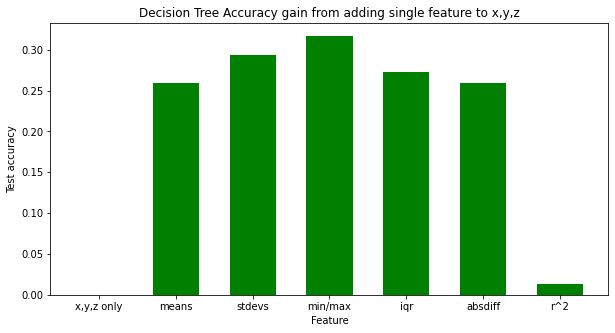

In [76]:
current_feats = list(raw_features)
base, _, _, _ = evaluate_with_features(final, current_feats)
data = { 'x,y,z only': 0 }

keys = featureDiffs.keys()
for label in keys:
    diff = featureDiffs[label]
    f1, f2, f3, f4 = evaluate_with_features(final, current_feats + diff)
    data[label] = f1['test'][0] - base['test'][0]

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='green', width = 0.6)
 
plt.xlabel("Feature")
plt.ylabel("Test accuracy")
plt.title("Decision Tree Accuracy gain from adding single feature to x,y,z")
plt.show()

prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

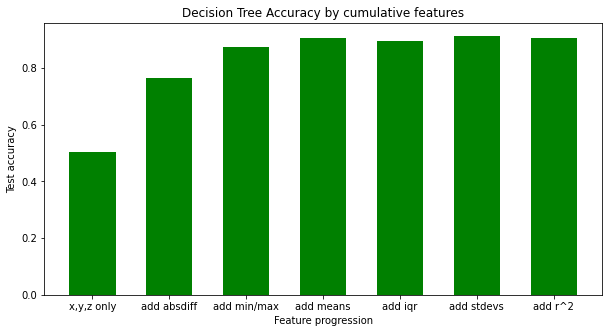

In [77]:
current_feats = list(raw_features)
f1, _, _, _ = evaluate_with_features(final, current_feats)
data = { 'x,y,z only': f1['test'][0] }

keys = list(featureDiffs.keys())
random.shuffle(keys)
for label in keys:
    diff = featureDiffs[label]
    current_feats += diff
    f1, f2, f3, f4 = evaluate_with_features(final, current_feats)
    data['add ' + label] = f1['test'][0]

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.6)
 
plt.xlabel("Feature progression")
plt.ylabel("Test accuracy")
plt.title("Decision Tree Accuracy by cumulative features")
plt.show()

prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/var/folders/9x/74q9p3s94zgb6czyxg30sxkm0000gn/T/ipykernel_95454/1472059605.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)


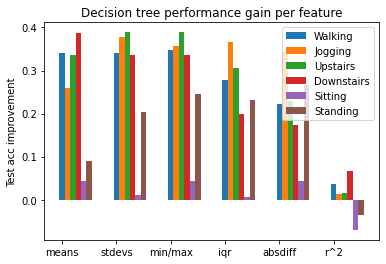

In [78]:
current_feats = list(raw_features)
_, base, _, _ = evaluate_with_features(final, current_feats)
data = { }

keys = featureDiffs.keys()
for label in keys:
    diff = featureDiffs[label]
    f1, f2, f3, f4 = evaluate_with_features(final, current_feats + diff)
    for c in f2:
        acc = f2[c][4]
        if not c in data:
            data[c] = {}
        data[c][label] = f2[c][5] - base[c][5]

fig, ax = plt.subplots()
x = np.arange(len(keys)) 
width = 0.1
for i, c in enumerate(data.keys()):
    rects = ax.bar(x + 6*width * i/len(list(data.keys())), data[c].values(), width, label=c)

labels = list(keys)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test acc improvement')
ax.set_title('Decision tree performance gain per feature')
ax.set_xticklabels([''] + labels)
ax.legend()

#fig.tight_layout()

plt.show()

prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0.0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0.0, rec: 0.0
prec: 0, rec: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0
prec: 0, rec: 0.0


/var/folders/9x/74q9p3s94zgb6czyxg30sxkm0000gn/T/ipykernel_95454/1790436111.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)


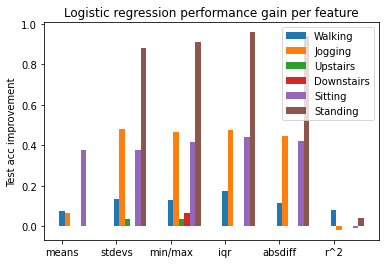

In [79]:
current_feats = list(raw_features)
_, _, _, base = evaluate_with_features(final, current_feats)
data = { }

keys = featureDiffs.keys()
for label in keys:
    diff = featureDiffs[label]
    f1, f2, f3, f4 = evaluate_with_features(final, current_feats + diff)
    for c in f4:
        acc = f4[c][4]
        if not c in data:
            data[c] = {}
        data[c][label] = f4[c][5] - base[c][5]

fig, ax = plt.subplots()
x = np.arange(len(keys)) 
width = 0.1
for i, c in enumerate(data.keys()):
    rects = ax.bar(x + 6*width * i/len(list(data.keys())), data[c].values(), width, label=c)

labels = list(keys)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test acc improvement')
ax.set_title('Logistic regression performance gain per feature')
ax.set_xticklabels([''] + labels)
ax.legend()

#fig.tight_layout()

plt.show()

### Quick Check: Does using modal class window help?

In [80]:
dt_stats, _, log_stats, _ = evaluate_with_features(final, features, 'class')
dt_stats_mode, _, log_stats_mode, _ = evaluate_with_features(final, features, 'class_mode')

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [81]:
dt_stats

,train,test
Accuracy,0.999607,0.903597
F1,0.999706,0.873142


In [82]:
dt_stats_mode

,train,test
Accuracy,0.999509,0.901533
F1,0.999590,0.866198


In [83]:
log_stats

,train,test
Accuracy,0.86936,0.867630
F1,0.81744,0.812987


In [84]:
log_stats_mode

,train,test
Accuracy,0.867197,0.863502
F1,0.813572,0.801945


It appears that using the modal activity per window didn't actually help much at
all, surprisingly.

## Examine performance by rolling window parameters
Here, we change the parameters of our rolling-window preprocessing and measure
how it impacts performance.

In [85]:
# Minimum observations needed in a window for the data point to count.
min_periods = 5

# If true, the window is centered around the given point. If false, the right
# edge of the window is used.
center = True

slow_stride = 20
normal_stride = 4 * 20
fast_stride = 8 * 20

# Now let's create some sample rolling hyper parameters to search over.
hypers = [
    {'w': 100, 'stride': slow_stride },
    {'w': 100, 'stride': normal_stride },
    {'w': 100, 'stride': fast_stride },
    {'w': 240, 'stride': slow_stride },
    {'w': 240, 'stride': normal_stride },
    {'w': 240, 'stride': fast_stride },
    {'w': 200, 'stride': slow_stride },
    {'w': 200, 'stride': normal_stride },
    {'w': 200, 'stride': fast_stride },
    {'w': 400, 'stride': slow_stride },
    {'w': 400, 'stride': normal_stride },
    {'w': 400, 'stride': fast_stride }
]


In [86]:
perf_frames = []
for param in hypers:
    print(param)
    # Reload our data fresh.
    data = pd.read_csv('./preProcessed_data.csv')

    w = param['w']
    stride = param['stride']
    add_rolling_metrics(data, w, min_periods, center)
    subsampled = subsample_data(data, stride, w)
    stats, class_stats = evaluate_with_features(subsampled, ext_features4, skip_log=True)
    perf_frames.append((stats, class_stats))


{'w': 100, 'stride': 20}
{'w': 100, 'stride': 80}
{'w': 100, 'stride': 160}
{'w': 240, 'stride': 20}
{'w': 240, 'stride': 80}
{'w': 240, 'stride': 160}
{'w': 200, 'stride': 20}
{'w': 200, 'stride': 80}
{'w': 200, 'stride': 160}
{'w': 400, 'stride': 20}
{'w': 400, 'stride': 80}
{'w': 400, 'stride': 160}


In [89]:
for frames, param in zip(perf_frames, hypers):
    print(param)
    print(frames[0])

{'w': 100, 'stride': 20}
             train      test
Accuracy  0.999487  0.936886
F1        0.999594  0.921657
{'w': 100, 'stride': 80}
             train      test
Accuracy  0.999512  0.886350
F1        0.999593  0.854416
{'w': 100, 'stride': 160}
             train      test
Accuracy  0.999610  0.857812
F1        0.999812  0.821619
{'w': 240, 'stride': 20}
             train      test
Accuracy  0.999729  0.964782
F1        0.999813  0.954806
{'w': 240, 'stride': 80}
             train      test
Accuracy  0.999704  0.909548
F1        0.999755  0.881324
{'w': 240, 'stride': 160}
             train      test
Accuracy  0.999803  0.887249
F1        0.999905  0.849666
{'w': 200, 'stride': 20}
             train      test
Accuracy  0.999680  0.958309
F1        0.999751  0.946455
{'w': 200, 'stride': 80}
             train      test
Accuracy  0.999607  0.917748
F1        0.999637  0.892180
{'w': 200, 'stride': 160}
             train      test
Accuracy  0.999607  0.885159
F1        0.999705

/var/folders/9x/74q9p3s94zgb6czyxg30sxkm0000gn/T/ipykernel_95454/3739262633.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)


(0.0, 1.0)

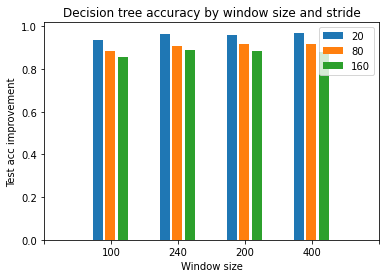

In [88]:
data = { }

for frames, param in zip(perf_frames, hypers):
    stats = frames[0]
    if param['stride'] not in data:
        data[param['stride']] = {}
    
    data[param['stride']][param['w']] = stats['test'][0]

fig, ax = plt.subplots()
width = 0.03
for i, c in enumerate(data.keys()):
    vals = list(data[c].values())
    size =len(vals)
    x = np.arange(size)/5 + 0.16
    rects = ax.bar(x + 5*width * i/size, vals, width, label=str(c))

labels = list(data[20].keys())

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test acc improvement')
ax.set_xlabel('Window size')
ax.set_title('Decision tree accuracy by window size and stride')
ax.set_xticklabels([''] + labels)
ax.legend()
ax.set_xlim(0, 1)

# Takeaways

## Data
The classes are highly imbalanced with walking/jogging being the two most
common. While the activities do seem to be well-separated, there are sometimes
long gaps between them.

The source paper doesn't go into much detail on handling accelerometer axis
orientation, so we ran PCA on the x,y,z data above. The results suggest that
the phones per user were not oriented in the same way -- however, training
our simple models on data projected onto standardized axes did not yield any
significant performance improvement, suggesting that, at least for the features
generated above, there is little impact on orientation itself.

## Features
All of the features generated above have a significant performance impact,
excluding perhaps R^2 (I'm surprised it's as low as it is).